In [1]:
%pylab inline

import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Сопряженное к Бернулли - Бета-распределение

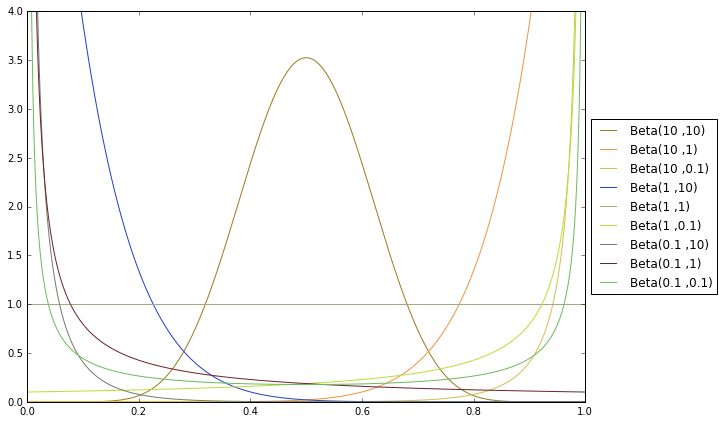

In [2]:
plt.figure(figsize=(10, 7))
plt.ylim((0, 4))

grid = np.arange(0, 1.001, 0.001)

#перебираем пары параметров и строи графики
for a in [10, 1, 0.1]:
    for b in [10, 1, 0.1]:
        beta_pdf = sps.beta.pdf(grid, a=a, b=b)
        plt.plot(grid, beta_pdf, color=random.rand(3, 1), label = 'Beta(' + str(a) + ' ,' + str(b) + ')')
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()

Наиболее общее:

Beta(10,10) - монета скорее честна

Beta(0.1,0.1) - монета скорее нечестна

Beta(10,1) - монета скорее нечестная, перевес в сторону герба

Оценка максимального правдоподобия для p в $Bern(p) - \overline{X}$

Сопряженное априорное распределение - $Beta(\alpha_0, \beta_0)$

$\Rightarrow апостериорное \space распределение - p(\theta \mid X) \sim Beta(\alpha_0 + \sum^{n}_{i = 1}X_{i}, \beta_0 + n - \sum^{n}_{i = 1}X_{i})$

$\Rightarrow байесовская \space оценка - \hat{\theta} = E(\theta | X) = \frac {\alpha_0 + \sum^{n}_{i = 1}X_{i}} {\alpha_0 + \beta_0 + n} $

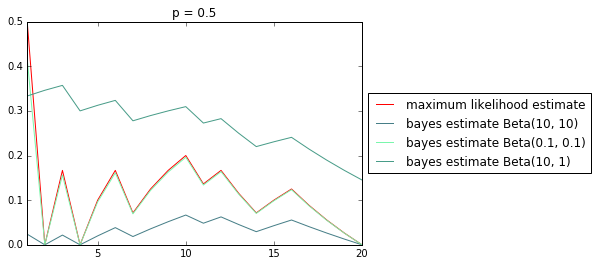

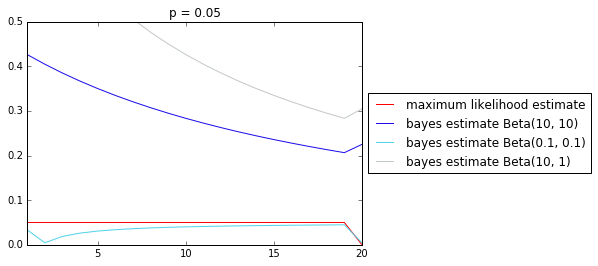

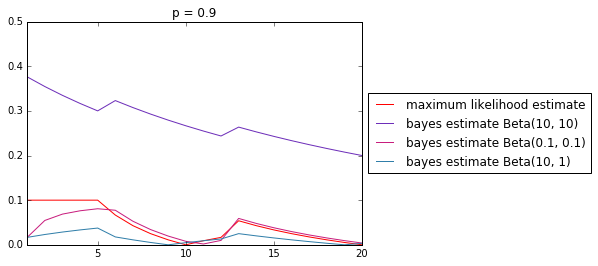

In [3]:
size = 20
p_ar = [0.5, 0.05, 0.9] # определяющие свойства "разных монет"
beta_params = [(10, 10), (0.1, 0.1), (10, 1)] # выбранные параметры априорного распределения
grid = np.arange(1, size+1)

for p in p_ar:
    s = sps.bernoulli.rvs(p, size=size) # "кидаем монету"

    plt.title('p = ' + str(p))
    plt.xlim((1, size))
    plt.ylim((0, 0.5))
    
    MLE_est = s.cumsum() / np.arange(1., size + 1.) #  считаем оценку максимального правдоподобия и строим график
    plt.plot(grid, abs(MLE_est - p), color='red', label='maximum likelihood estimate')

    # считаем байесовскую оценку и строим график
    for (a, b) in beta_params:
        bayes_est = (a + s.cumsum()) / (a + b + np.arange(1., size + 1.))
        plt.plot(grid, abs(bayes_est - p), color=random.rand(3, 1), label='bayes estimate Beta(' + str(a) + ', ' + str(b) + ')')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Для p = 0.5 лучшей оценкой оказалась байесовская оценка с априорным распределением Beta(10, 10), монета скорее честна.

Для p = 0.05 лучшими оценками оказались оценка максимального правдоподобия и байесовская с априорным распределением Beta(0.1, 0.1), монета скорее не честна.

Для p = 0.9 лучшей оценкой оказалась байесовская оценка с априорным распределением Beta(10, 1), монета скорее нечестная, перевес в сторону герба